# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1685130024876.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,05/25/2023,4151.28,--,4155.71,4165.74,4129.73
1,05/24/2023,4115.24,--,4132.96,4132.96,4103.98
2,05/23/2023,4145.58,--,4176.80,4185.68,4142.54
3,05/22/2023,4192.63,--,4190.78,4209.22,4179.68
4,05/19/2023,4191.98,--,4204.15,4212.91,4180.20
...,...,...,...,...,...,...
2536,05/31/2013,1630.74,--,1652.13,1658.99,1630.74
2537,05/30/2013,1654.41,--,1649.14,1661.91,1648.61
2538,05/29/2013,1648.36,--,1656.57,1656.57,1640.05
2539,05/28/2013,1660.06,--,1652.63,1674.21,1652.63


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2541.000000,2541.000000,2541.000000,2541.000000
mean,2833.790480,2815.876104,2831.186962,2799.258005
std,874.096428,910.388515,917.073451,903.174844
min,1573.090000,0.000000,0.000000,0.000000
25%,2078.580000,2077.180000,2085.000000,2066.110000
50%,2679.250000,2680.800000,2692.640000,2659.140000
75%,3572.660000,3563.220000,3588.110000,3547.480000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2518.000000,2518.000000,2518.000000,2518.000000
mean,2842.006473,2841.596974,2857.047685,2824.827081
std,873.698849,873.649467,880.223949,866.557480
min,1573.090000,1577.520000,1588.770000,1560.330000
25%,2080.842500,2081.010000,2089.480000,2070.350000
50%,2690.010000,2687.140000,2704.845000,2674.945000
75%,3584.630000,3593.597500,3627.160000,3568.170000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2539
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2518 non-null   object 
 1   Close/Last  2518 non-null   float64
 2   Volume      2518 non-null   object 
 3   Open        2518 non-null   float64
 4   High        2518 non-null   float64
 5   Low         2518 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.7+ KB


In [5]:
df.shape

(2518, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

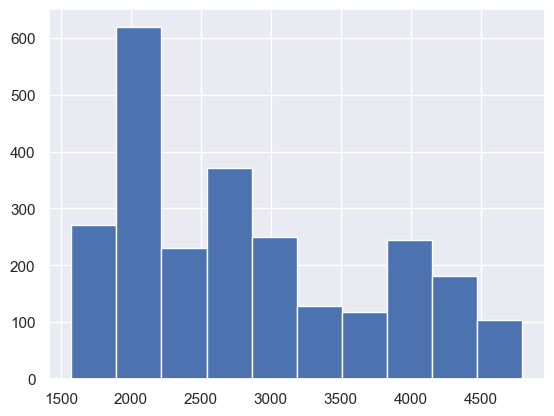

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4151.28

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2842.0064733915888

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.6988490745821

In [11]:
sigma1 = close_mean + close_sd
sigma1

3715.705322466171

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4589.404171540753

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5026.253596078044

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2518 entries, 0 to 2539
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2518 non-null   datetime64[ns]
 1   Close/Last  2518 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2013-05-28 to 2023-05-25')

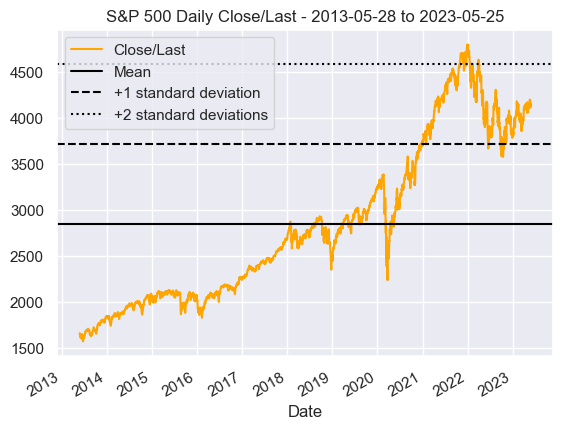

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2013-05-28 to 2023-05-25')

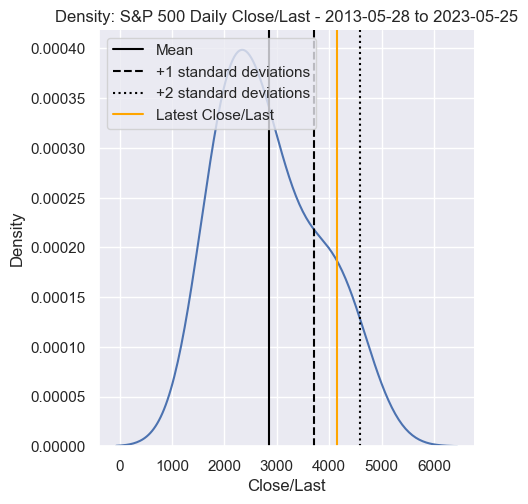

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4985409766708375

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results